In [37]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
ds = pd.read_csv('data/wdds.csv')
ds.shape

(2097, 20)

In [40]:
ds['label'] = ds['type']

In [41]:
ds = ds[~ds.label.isnull()].copy()
ds.shape

(1559, 21)

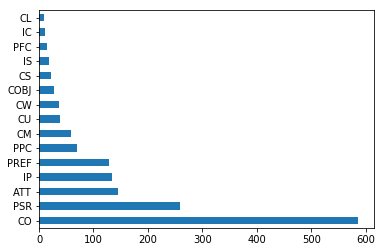

In [42]:
ds['target'] = ds['subtype']
ds['target'].value_counts().plot.barh()

In [35]:
ds.groupby('label').size()

label
ARGUMENTATIVE    778
INTERPERSONAL    145
PERFORMATIVE     636
dtype: int64

## agreement

In [31]:
from sklearn.metrics import cohen_kappa_score

label_f1 = 'subtype_r1'
label_f2 = 'subtype_r2'
ds = pd.read_csv('data/wdds.csv')
ds['agreement'] = ds[label_f1] == ds[label_f2]
ds['agreement'] = ds['agreement'].apply(lambda x: float(x))
ds_rs = ds.groupby(label_f1).agg({'agreement': 'mean'})
ds_rs = ds_rs.reset_index()
ds_rs.columns=['type', 'agreement']
ds_rs['kappa'] = cohen_kappa_score(ds[label_f1], ds[label_f2])
ds_rs.to_csv('output/agreement.csv', index=False)
ds_rs.head()

,type,agreement,kappa
0,CO,1.0,1.0
1,ATT,1.0,1.0
2,ATT+,1.0,1.0
3,ATT-,1.0,1.0
4,ATTP,1.0,1.0
